In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('house_price_area_only.csv')
df.head()

,price,area
0,598291,1188
1,1744259,3512
2,571669,1134
3,493675,1940
4,1101539,2208


In [18]:
df['intercept'] = 1

df.head()

,price,area,intercept
0,598291,1188,1
1,1744259,3512,1
2,571669,1134,1
3,493675,1940,1
4,1101539,2208,1


In [19]:
lm = sm.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        19:34:20   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Weight of diamonds and price

In [20]:
df = pd.read_csv('carats.csv')
df.columns = ['carats', 'price']
df.head()

,carats,price
0,0.16,328
1,0.17,350
2,0.18,325
3,0.25,642
4,0.16,342


In [21]:
df['intercept'] = 1

In [22]:
lm = sm.OLS(df['price'], df[['intercept', 'carats']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2019.
Date:                Mon, 03 May 2021   Prob (F-statistic):           4.95e-39
Time:                        19:34:23   Log-Likelihood:                -228.67
No. Observations:                  47   AIC:                             461.3
Df Residuals:                      45   BIC:                             465.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -258.3907     17.583    -14.695      0.000    -293.805    -222.977
carats      3716.8600     82.721     44.932      0.000    3550.251    3883.469
==============================================================================
Omnibus:                        0.689   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.146
Skew:                           0.026   Prob(JB):                        0.929
Kurtosis:                       3.268   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

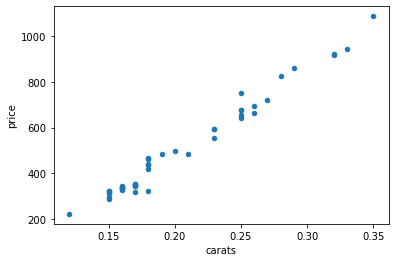

In [24]:
df.plot(kind='scatter', x='carats', y='price');

# Home Vs Crime data

In [25]:
from sklearn.datasets import load_boston

In [36]:
boston_data = load_boston()

In [33]:
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df['intercept'] = 1
df.head()

,MedianHomePrice,CrimePerCapita,intercept
0,24.0,0.00632,1
1,21.6,0.02731,1
2,34.7,0.02729,1
3,33.4,0.03237,1
4,36.2,0.06905,1


The Boston housing data is a built in dataset in the sklearn library of python.  You will be using two of the variables from this dataset, which are stored in **df**. The median home price in thousands of dollars and the crime per capita in the area of the home are shown above.

`1.` Use this dataframe to fit a linear model to predict the home price based on the crime rate.  Use your output to answer the first quiz below. Don't forget an intercept.

In [35]:
lm = sm.OLS(df['MedianHomePrice'], df[['intercept', 'CrimePerCapita']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.17e-19
Time:                        19:56:59   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         24.0331      0.409     58.740      0.000      23.229      24.837
CrimePerCapita    -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.Plot the relationship between the crime rate and median home price below. Use your plot and the results from the first question as necessary to answer the remaining quiz questions below.

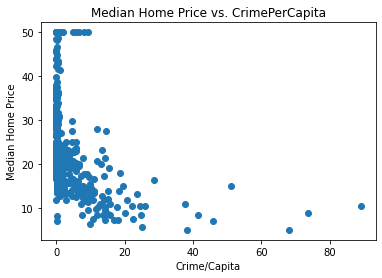

In [39]:
plt.scatter(df['CrimePerCapita'], df['MedianHomePrice']);
plt.xlabel('Crime/Capita');
plt.ylabel('Median Home Price');
plt.title('Median Home Price vs. CrimePerCapita');

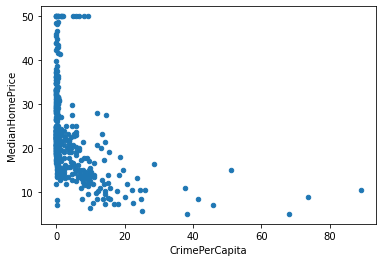

In [38]:
df.plot(kind='scatter', x='CrimePerCapita', y='MedianHomePrice');